In [2]:
# Importamos las librerías necesarias para el análisis de los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargamos los datos en DataFrames

cash_request = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [3]:
df = cash_request.join(fees[['total_amount', 'type', 'category', 'charge_moment']]) # Juntamos los dos datasets en un solo dataframe
df.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,incident,rejected_direct_debit,after
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after


### Tratamiento del dataframe

In [4]:
# Comprobamos que los datos se han cargado correctamente y visualizamos las primeras filas de cada DataFrame
# para hacernos una idea de la estructura de los datos y de las columnas que contienen los DataFrames

# Comprobamos si hay valores nulos en el DataFrame df
df.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
total_amount                   2909
type                           2909
category                      21774
charge_moment                  2909
dtype: int64

In [5]:
# Visualizamos las primeras filas del DataFrame cash_request
df.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,incident,rejected_direct_debit,after
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after


In [6]:
# Información sobre el DataFrame cash_request
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [7]:
# Estadísticas descriptivas del DataFrame cash_request, usamos transpose para que se visualicen mejor
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,23970.0,13910.966124,7788.117214,3.0,7427.25,14270.5,20607.75,27010.0
amount,23970.0,82.720818,26.528065,1.0,50.00,100.0,100.00,200.0
user_id,21867.0,32581.250789,27618.565773,34.0,10804.00,23773.0,46965.00,103719.0
deleted_account_id,2104.0,9658.755228,7972.743249,91.0,3767.00,6121.5,16345.00,30445.0
total_amount,21061.0,5.000237,0.034453,5.0,5.00,5.0,5.00,10.0


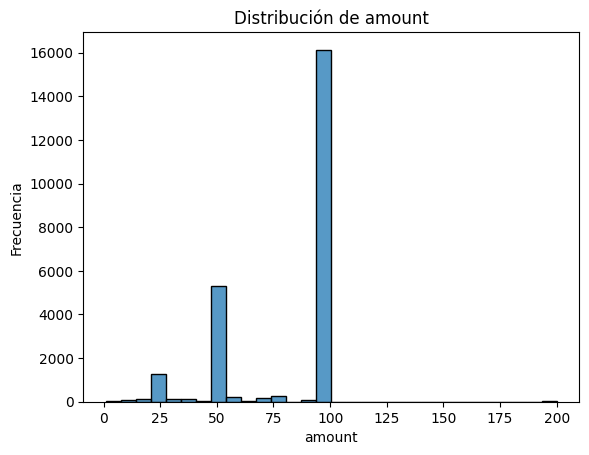

In [8]:
# Histograma de la variable amount
sns.histplot(df['amount'], bins=30) 

plt.title('Distribución de amount') # Título del histograma
plt.xlabel('amount')                # Etiqueta del eje x
plt.ylabel('Frecuencia')            # Etiqueta del eje y
plt.show()                          # Mostramos el histograma

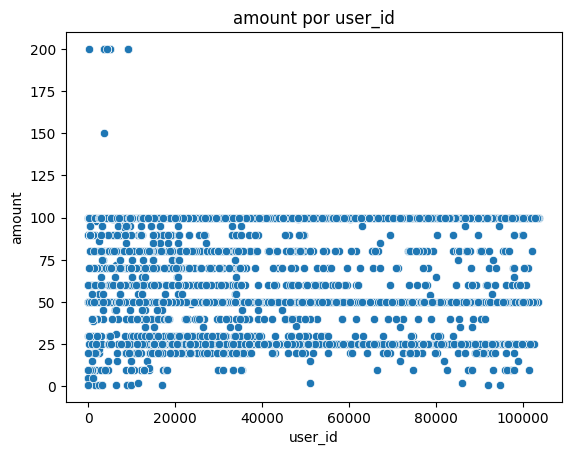

In [9]:
# Scatterplot de la variable amount en función de user_id
sns.scatterplot(x='user_id', y='amount', data=df)

plt.title('amount por user_id') # Título del scatterplot
plt.xlabel('user_id')           # Etiqueta del eje x
plt.ylabel('amount')            # Etiqueta del eje y
plt.show()                      # Mostramos el scatterplot

### **0. Creación de las cohortes por mes:** Basado en el mes de creación de la primera transacción (created_at)

1. Convertir la columna created_at a formato datetime
2. Crear una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'

In [10]:
# Convertir la columna created_at a formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])

df.info() # Comprobamos que la columna created_at se ha convertido a formato datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [11]:
# Crear una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'
df['mes_cohorte'] = df['created_at'].dt.to_period('M')  

df.head() # Visualizamos las primeras filas del DataFrame df para comprobar que se ha creado la nueva columna

C:\Users\polka\AppData\Local\Temp\ipykernel_13288\1485481734.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['mes_cohorte'] = df['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment,mes_cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,incident,rejected_direct_debit,after,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-05


### **1. Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

1. Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas

En nuestro caso añadimos la columna 'id' con la cantidad de estas en cada 'mes_cohorte'

In [12]:
# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas

cohortes_count = df.groupby(by='mes_cohorte').agg({ 
  'id': 'count', # Contamos el número de transacciones por mes de cohorte
  }).rename(columns={'id': 'n_transacciones'})
cohortes_count

,n_transacciones
mes_cohorte,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2019-11'),
  Text(1, 0, '2019-12'),
  Text(2, 0, '2020-01'),
  Text(3, 0, '2020-02'),
  Text(4, 0, '2020-03'),
  Text(5, 0, '2020-04'),
  Text(6, 0, '2020-05'),
  Text(7, 0, '2020-06'),
  Text(8, 0, '2020-07'),
  Text(9, 0, '2020-08'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-10'),
  Text(12, 0, '2020-11')])

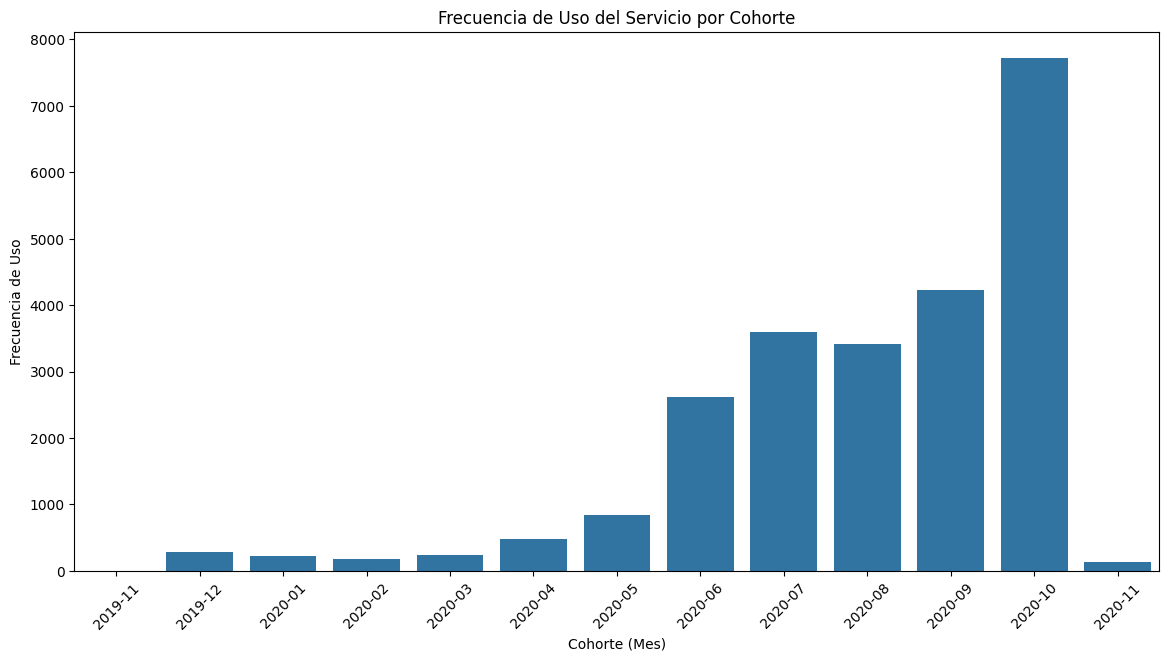

In [13]:
plt.figure(figsize=(14, 7)) # Tamaño de la figura

# Barplot de la variable id en función de mes_cohorte
sns.barplot(x='mes_cohorte', y='n_transacciones', data=cohortes_count)   # 
plt.title('Frecuencia de Uso del Servicio por Cohorte')     # Título del barplot
plt.xlabel('Cohorte (Mes)')                                 # Etiqueta del eje x
plt.ylabel('Frecuencia de Uso')                             # Etiqueta del eje y
plt.xticks(rotation=45)                                     # Los nombres del eje X, los ponemos a 45 grados

Desde el inicio del servicio se observa un aumento de la frequencia del uso progresiva, hasta la cohorte del 10-2020 que, muestra una frequencia mucho mas elevada que el resto. Y luego la del 11-2020 vuelve a niveles muy bajos.

### **2. Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [14]:
# Devuelve un array de las categorias unicas de la columna 'status' enne

df['status'].unique()

array(['rejected', 'money_back', 'canceled', 'active',
       'direct_debit_rejected', 'transaction_declined',
       'direct_debit_sent'], dtype=object)

Entendemos que los incidentes de pago son los valores 'rejected' de la columna 'status'
1. Calcular el numero de 'rejected' en la columna 'status'
2. El total de transacciones lo tenemos del punto anterior
3. Calcular el porcentaje de 'rejected' sobre el total

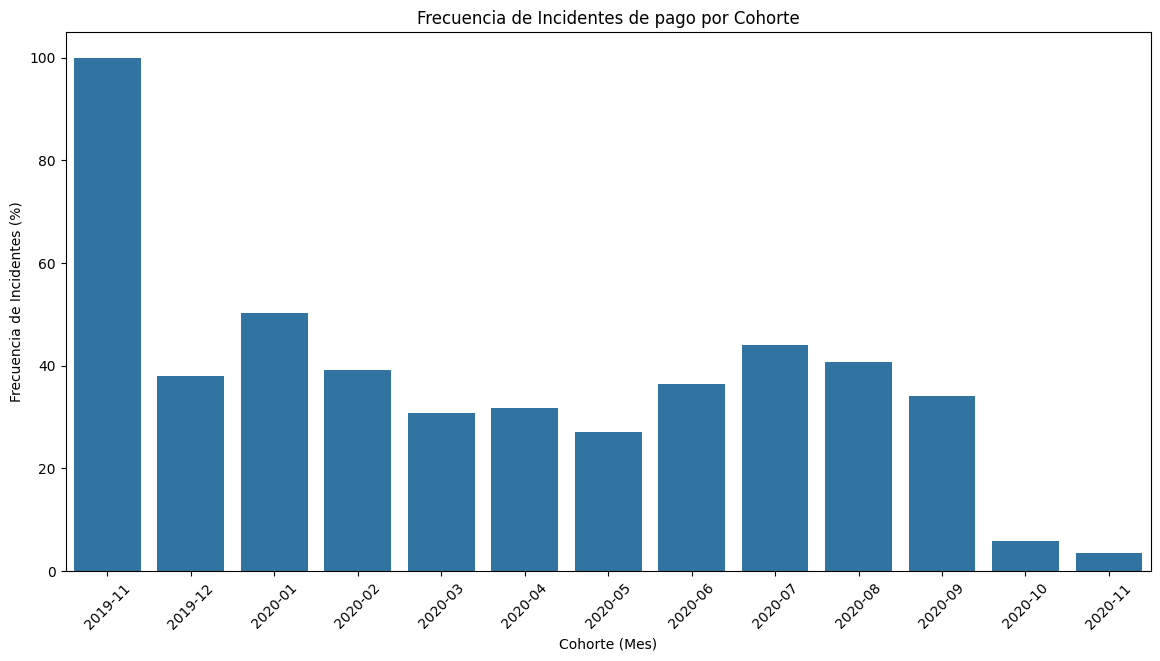

In [15]:
# Guardamos las filas del dataframe donde el 'status' == 'rejected' en un nuevo dataframe llamado 'incidentes'
incidentes = df[df['status'] == 'rejected']

# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas
incidentes_count = incidentes.groupby(by='mes_cohorte').agg({ 
  'id': 'count'   # Contamos el número de incidentes
}).rename(columns={'id': 'n_incidentes'})

cohortes_incidentes = cohortes_count.join(incidentes_count).fillna(1) # Crear dataframe agrupando los dataframes 'cohortes_count' y 'incidentes_count'
cohortes_incidentes['tasa_incidentes'] = (cohortes_incidentes['n_incidentes'] / cohortes_incidentes['n_transacciones'])*100 # Añadir columna con la tasa de incidentes en %

porcentaje = (incidentes_count / cohortes_count) * 100

plt.figure(figsize=(14, 7)) # Tamaño de la figura

# Barplot de la variable id en función de mes_cohorte
sns.barplot(x='mes_cohorte', y='tasa_incidentes', data=cohortes_incidentes)   # 
plt.title('Frecuencia de Incidentes de pago por Cohorte')   # Título del barplot
plt.xlabel('Cohorte (Mes)')                                 # Etiqueta del eje x
plt.ylabel('Frecuencia de Incidentes (%)')                  # Etiqueta del eje y
plt.xticks(rotation=45)                                     # Los nombres del eje X, los ponemos a 45 grados

plt.show()

### 3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.

(Entendemos que los ingresos generados son los que muestra la columna total_amount del dataset fees)

In [16]:
# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas
ingresos_sum = df.groupby(by='mes_cohorte').agg({ 
  'total_amount': 'sum'   # Contamos el número de transacciones por mes de cohorte
}).rename(columns={'total_amount': 'ingresos'})

df_ingresos = cohortes_incidentes.join(ingresos_sum).fillna(1)
df_ingresos

,n_transacciones,n_incidentes,tasa_incidentes,ingresos
mes_cohorte,,,,
2019-11,1,1.0,100.000000,5.0
2019-12,289,110.0,38.062284,1445.0
2020-01,223,112.0,50.224215,1115.0
2020-02,184,72.0,39.130435,920.0
2020-03,244,75.0,30.737705,1220.0
2020-04,473,150.0,31.712474,2365.0
2020-05,837,227.0,27.120669,4185.0
2020-06,2615,953.0,36.443595,12910.0
2020-07,3601,1584.0,43.987781,17810.0


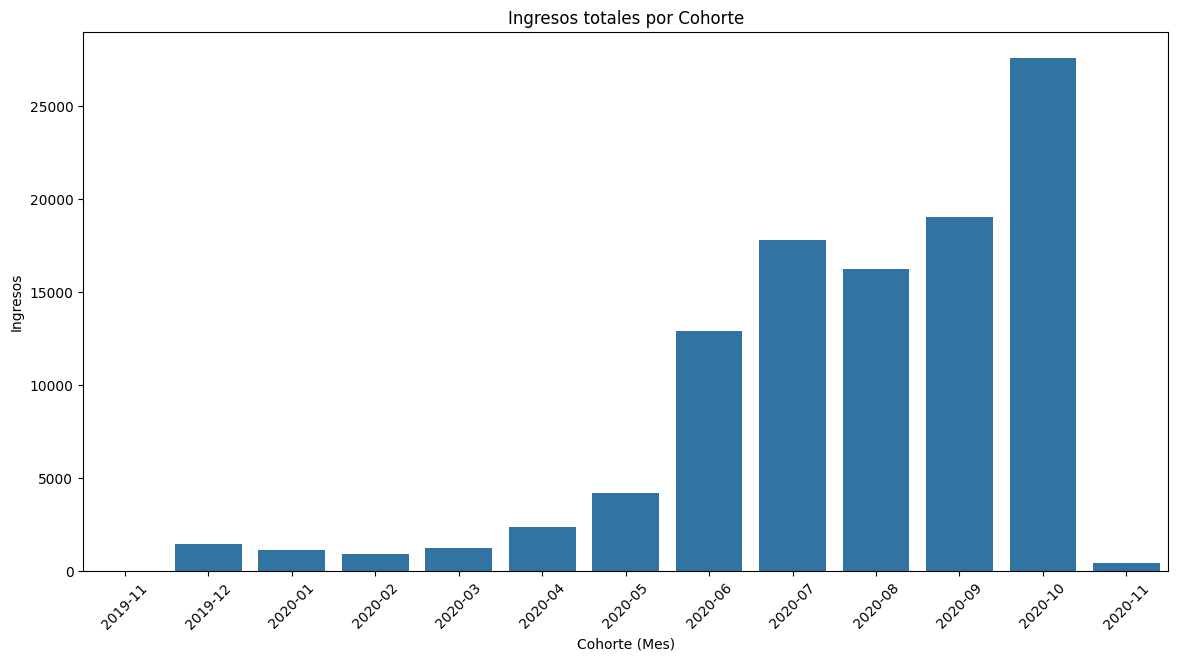

In [17]:
plt.figure(figsize=(14, 7)) # Tamaño de la figura

# Barplot de la variable ingresos en función de mes_cohorte
sns.barplot(x='mes_cohorte', y='ingresos', data=df_ingresos)   # 
plt.title('Ingresos totales por Cohorte')                   # Título del barplot
plt.xlabel('Cohorte (Mes)')                                 # Etiqueta del eje x
plt.ylabel('Ingresos')                                      # Etiqueta del eje y
plt.xticks(rotation=45)                                     # Los nombres del eje X, los ponemos a 45 grados

plt.show()

### 4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

In [18]:
df['category'].unique()

array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
      dtype=object)

In [19]:
df

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment,mes_cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,incident,rejected_direct_debit,after,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,...,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,...,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,NaN,NaN,NaN,NaN,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10


C:\Users\polka\AppData\Local\Temp\ipykernel_13288\2785015661.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(pd.cut(df['time_difference_seconds'], bins=5)).size()


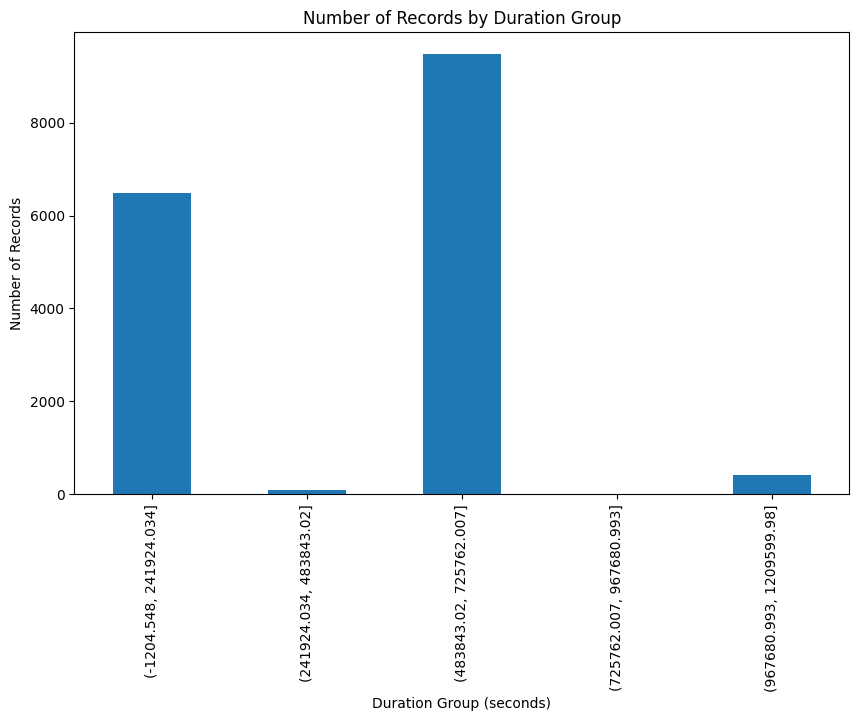

In [30]:
# Convertir las columnas 'created_at' y 'send_at' a formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['send_at'] = pd.to_datetime(df['send_at'], errors='coerce')

# Calcular la diferencia de tiempo entre 'created_at' y 'send_at'
df['time_difference'] = df['send_at'] - df['created_at']

# Convertir la diferencia de tiempo a segundos para una mejor visualización
df['time_difference_seconds'] = df['time_difference'].dt.total_seconds()

# Eliminar las filas con NaN en 'time_difference_seconds'
df = df.dropna(subset=['time_difference_seconds'])

# Agrupar los datos por la duración en segundos y contar las ocurrencias
grouped_data = df.groupby(pd.cut(df['time_difference_seconds'], bins=5)).size()

# Crear un gráfico de barras para visualizar la agrupación
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Duration Group (seconds)')
plt.ylabel('Number of Records')
plt.title('Number of Records by Duration Group')
plt.show()

In [32]:
df

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment,mes_cohorte,time_difference,time_difference_seconds
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,...,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-10,0 days 00:01:00.714598,60.714598
55,9323,50.0,rejected,2020-07-21 21:33:12.430494+00:00,2020-07-22 08:59:33.989211+00,23318.0,2020-07-22 08:59:33.986846+00,NaN,2020-08-05 22:00:00+00,NaN,...,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-07,6 days 23:59:59.999593,604799.999593
60,18701,100.0,rejected,2020-10-01 11:41:07.208207+00:00,2020-10-01 12:26:23.482538+00,57285.0,2020-10-01 12:26:23.47496+00,NaN,2020-11-04 22:00:00+00,NaN,...,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-10,6 days 23:59:59.961929,604799.961929
62,16121,50.0,rejected,2020-09-14 23:05:32.606904+00:00,2020-09-15 08:16:28.688342+00,38075.0,2020-09-15 08:16:28.681129+00,NaN,2020-10-05 22:00:00+00,NaN,...,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-09,6 days 23:59:59.951471,604799.951471
135,18459,100.0,rejected,2020-09-29 18:36:25.875659+00:00,2020-09-30 07:51:52.005581+00,55584.0,2020-09-30 07:51:51.997203+00,NaN,2020-10-07 22:00:00+00,NaN,...,NaN,NaN,NaN,5.0,instant_payment,NaN,after,2020-09,6 days 23:59:59.974298,604799.974298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10,0 days 00:00:12.666631,12.666631
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,...,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,NaN,NaN,NaN,NaN,2020-10,0 days 00:00:32.167036,32.167036
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10,0 days 00:00:10.164616,10.164616
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10,0 days 00:00:27.667941,27.667941


In [31]:
df['time_difference']

48      0 days 00:01:00.714598
55      6 days 23:59:59.999593
60      6 days 23:59:59.961929
62      6 days 23:59:59.951471
135     6 days 23:59:59.974298
                 ...          
23965   0 days 00:00:12.666631
23966   0 days 00:00:32.167036
23967   0 days 00:00:10.164616
23968   0 days 00:00:27.667941
23969   0 days 00:00:12.370478
Name: time_difference, Length: 16466, dtype: timedelta64[ns]

### **Limpieza del dataframe**

In [28]:
# Detectar las filas en las que el total_amount es = a 10
df['total_amount'].unique()
filtered_df_by_total_amount = df[df['total_amount'] == 10]
filtered_df_by_total_amount

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,recovery_status,reco_creation,reco_last_update,total_amount,type,category,charge_moment,mes_cohorte,time_difference,time_difference_seconds
20604,23033,100.0,money_back,2020-10-22 11:12:18.346229+00:00,2020-12-18 13:12:35.555556+00,32691.0,NaN,NaN,2020-11-05 12:11:56+00,2020-10-23,...,NaN,NaN,NaN,10.0,instant_payment,NaN,after,2020-10,0 days 21:18:27.404591,76707.404591


In [ ]:
# Obtener los datos de la columna 'id'
numerical_data1 = cohortes_count['n_transacciones']
numerical_data2 = porcentaje['id']

# Eliminar filas con valores no finitos en numerical_data2
numerical_data2 = numerical_data2[np.isfinite(numerical_data2)]

# Calcular la distribución normal para numerical_data1
mu1, std1 = stats.norm.fit(numerical_data1)
x1 = np.linspace(numerical_data1.min(), numerical_data1.max(), 100)
p1 = stats.norm.pdf(x1, mu1, std1)

# Calcular la distribución normal para numerical_data2
mu2, std2 = stats.norm.fit(numerical_data2)
x2 = np.linspace(numerical_data2.min(), numerical_data2.max(), 100)
p2 = stats.norm.pdf(x2, mu2, std2)

# Crear el histograma y las líneas curvas para numerical_data1
plt.hist(numerical_data1, bins=5, density=True, alpha=0.6, color='g', label='cohortes_count')
plt.plot(x1, p1, 'g', linewidth=2)

# Crear el histograma y las líneas curvas para numerical_data2
plt.hist(numerical_data2, bins=5, density=True, alpha=0.6, color='b', label='porcentaje')
plt.plot(x2, p2, 'b', linewidth=2)

# Añadir título y leyenda
plt.title('Distribución normal ajustada')
plt.legend()
plt.show()


KeyError: 'id'

In [ ]:
# Convertir los datos en DataFrames
cohortes_count = pd.DataFrame(cohortes_count)
porcentaje = pd.DataFrame(porcentaje)

# Eliminar filas con valores no finitos en porcentaje
porcentaje = porcentaje[np.isfinite(porcentaje)]

# Calcular la distribución normal para cohortes_count
mu1, std1 = stats.norm.fit(cohortes_count['id'])
xmin1, xmax1 = cohortes_count['id'].min(), cohortes_count['id'].max()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = stats.norm.pdf(x1, mu1, std1)

# Calcular la distribución normal para porcentaje
mu2, std2 = stats.norm.fit(porcentaje['id'])
xmin2, xmax2 = porcentaje['id'].min(), porcentaje['id'].max()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = stats.norm.pdf(x2, mu2, std2)

# Crear el histograma y las líneas curvas para cohortes_count
plt.hist(cohortes_count['id'], bins=5, density=True, alpha=0.6, color='g', label='cohortes_count')
plt.plot(x1, p1, 'g', linewidth=2)

# Crear el histograma y las líneas curvas para porcentaje
plt.hist(porcentaje['id'], bins=5, density=True, alpha=0.6, color='b', label='porcentaje')
plt.plot(x2, p2, 'b', linewidth=2)

# Añadir título y leyenda
plt.title('Distribución normal ajustada')
plt.legend()
plt.show()

ValueError: The data contains non-finite values.